## Neurons
* https://brian2.readthedocs.io/en/stable/resources/tutorials/1-intro-to-brian-neurons.html
* brian2를 부를 때 '''from brian2 import *''' 를 사용한다. 그 이유는 volt, ms등 단위를 사용할 때 brian2.를 붙이지 않아도 되기 때문이다.
* Gerstner tutorial에서는 b2로 축약해서 쓴다.


In [1]:
from brian2 import *
%matplotlib inline

### Units system

In [2]:
20*volt

20. * volt

In [3]:
1000*amp

1. * kamp

In [4]:
1e6*volt

1. * Mvolt

In [5]:
1000*namp

1. * uamp

In [6]:
1*namp

1. * namp

In [7]:
10*nA*5*Mohm # 10 nA through a 5 MOhm resistor -> 50mV

50. * mvolt

In [8]:
#5*amp + 10*volt #error

### Simple neuron model

In [9]:
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 # unit for v
'''

* At the end of a line you write : unit where unit is the SI unit of that variable. Note that this is not the unit of the two sides of the equation (which would be 1/second), but the unit of the variable defined by the equation, i.e. in this case 𝑣. 

In [10]:
G = NeuronGroup(1, eqs) # one neuron with eqs as equations

In [11]:
eqs = '''
dv/dt = 1-v : 1
'''
G = NeuronGroup(1, eqs)
#run(100*ms)

In [12]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 # unit for v
'''

G = NeuronGroup(1, eqs)
run(100*ms)

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.19s). [brian2.stateupdaters.base.method_choice]


In [13]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])

Before v = 0.0
After v = 0.9999546000702376


* By default, all variables start with the value 0. Since the differential equation is dv/dt=(1-v)/tau we would expect after a while that v would tend towards the value 1, which is just what we see. Specifically, we’d expect v to have the value 1-exp(-t/tau). Let’s see if that’s right.

In [14]:
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))

Expected value of v = 0.9999546000702375


Text(0, 0.5, 'v')

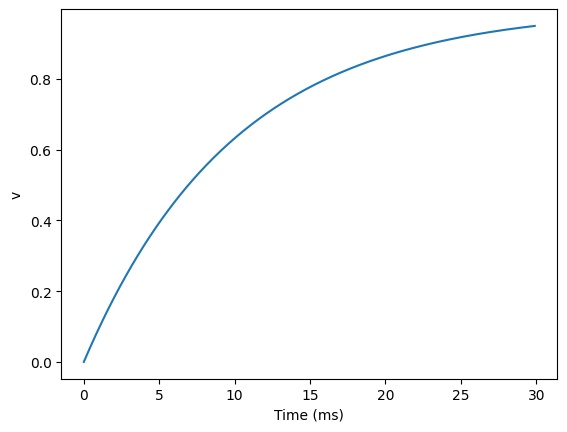

In [15]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)

run(30*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

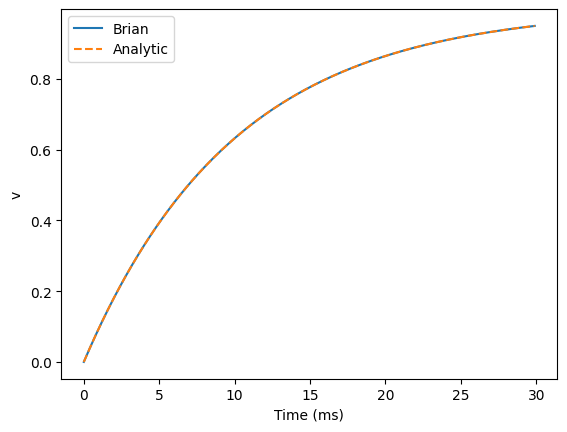

In [16]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0)

run(30*ms)

plot(M.t/ms, M.v[0], 'C0', label='Brian')
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--',label='Analytic')
xlabel('Time (ms)')
ylabel('v')
legend()

Text(0, 0.5, 'v')

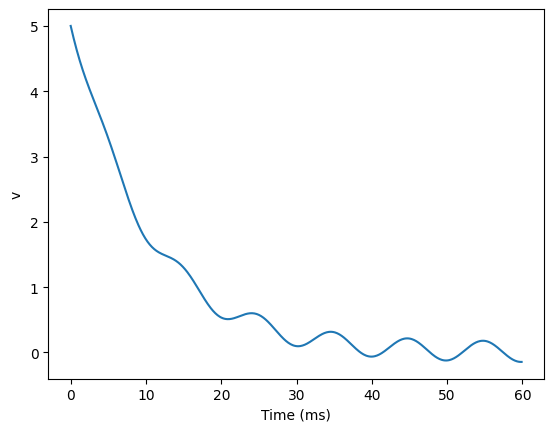

In [17]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1
'''

# Change to Euler method because exact integrator doesn't work here
G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=0)

G.v = 5 # initial value, How to set up initial value?

run(60*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

Text(0, 0.5, 'v')

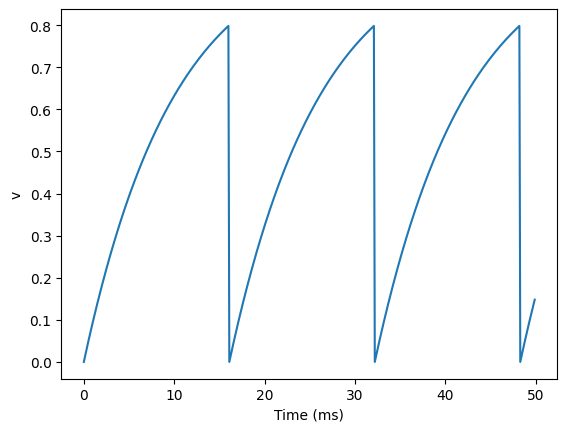

In [18]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')
# set threshold to 0.8 and reset to 0
M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')

Spike times: [16.  32.1 48.2] ms


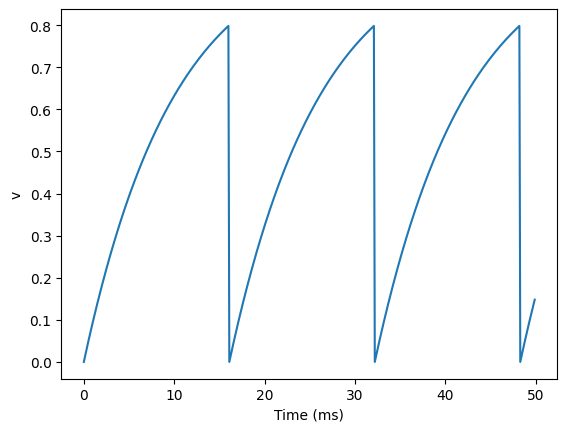

In [19]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G)

run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')
print('Spike times: %s' % spikemon.t[:])

Spike times: [10.6 21.3 32.  42.7] ms


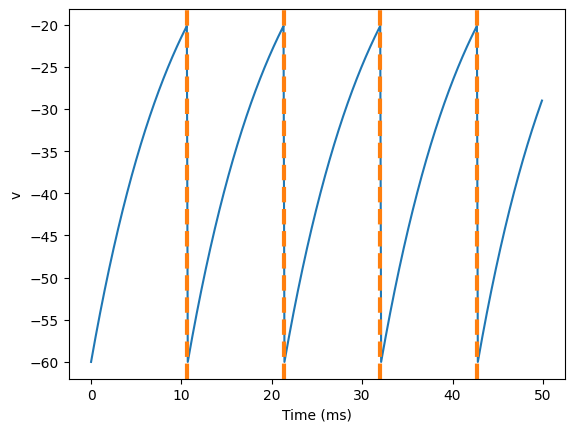

In [20]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>-20', reset='v = -60', method='exact')
G.v = -60
spikemon = SpikeMonitor(G)
statemon = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v')
print('Spike times: %s' % spikemon.t[:])

### Refractoriness

Text(0, 0.5, 'v')

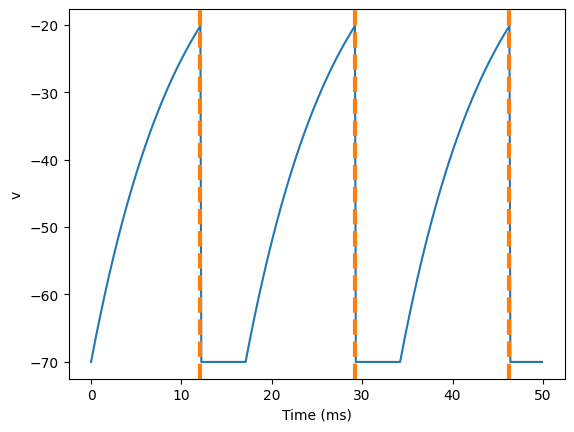

In [21]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, threshold='v>-20', reset='v = -70', refractory=5*ms, method='exact')
G.v = -70
statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v')

* As you can see in this figure, after the first spike, v stays at 0 for around 5 ms before it resumes its normal behaviour. To do this, we’ve done two things. Firstly, we’ve added the keyword refractory=5*ms to the NeuronGroup declaration. On its own, this only means that the neuron cannot spike in this period (see below), but doesn’t change how v behaves. In order to make v stay constant during the refractory period, we have to add (unless refractory) to the end of the definition of v in the differential equations. What this means is that the differential equation determines the behaviour of v unless it’s refractory in which case it is switched off.

Spike times: [12.1 27.1 42.1] ms


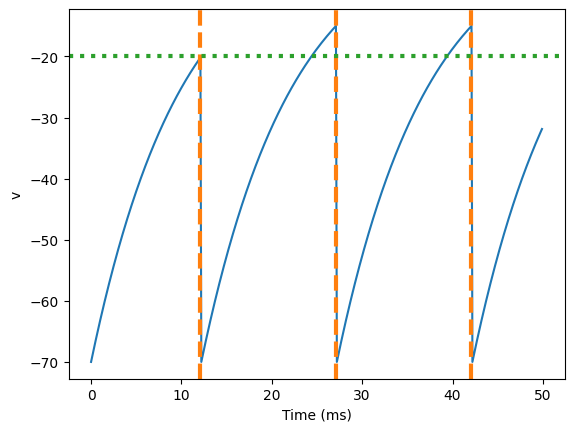

In [22]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 
'''# note that there is no refractory period

G = NeuronGroup(1, eqs, threshold='v>-20', reset='v = -70', refractory=15*ms, method='exact')
# since we set refractory period to 15ms, the neuron will not fire for 15ms after a spike even though the threshold is reached.
G.v = -70
statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
axhline(-20, ls=':', c='C2', lw=3)
xlabel('Time (ms)')
ylabel('v')
print("Spike times: %s" % spikemon.t[:])

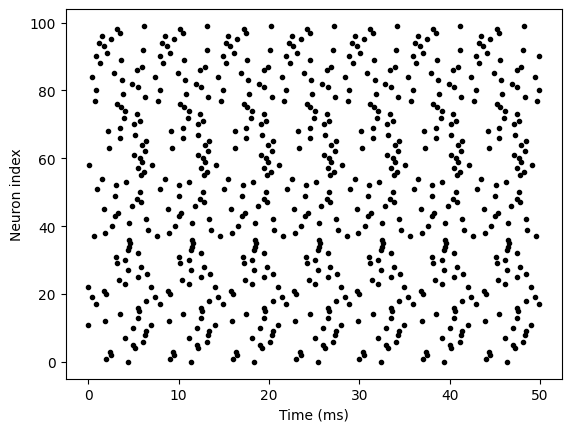

In [28]:
start_scope()

N = 100
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()'

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');

### Parameters

Text(0, 0.5, 'Firing rate (sp/s)')

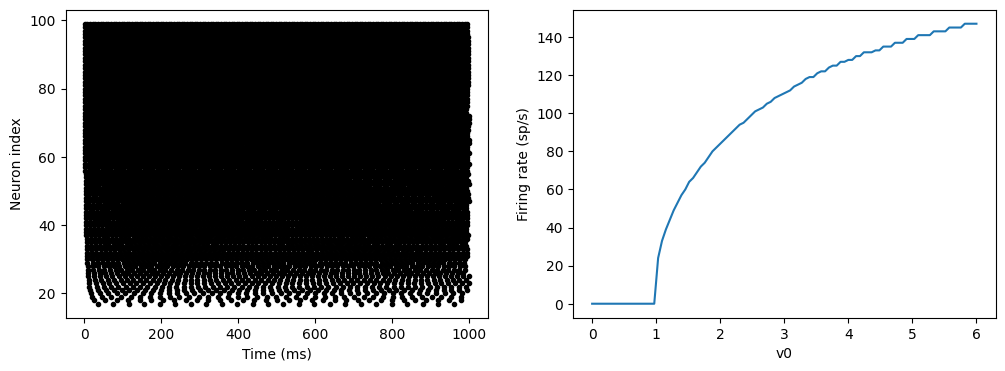

In [30]:
start_scope()

N = 100
tau = 10*ms
v0_max = 6.
duration = 1000*ms

eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)' #i is the index of the neuron

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)')

### Stochastic neurons

Text(0, 0.5, 'Firing rate (sp/s)')

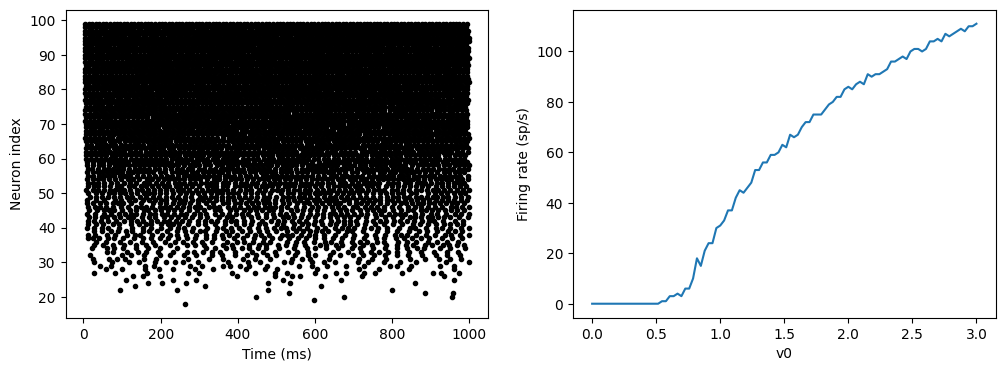

In [31]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''
# xi symbol is a random variable with mean 0 and variance 1

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
# method 'exact' doesn't work here
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)')

### Adding "StateMonitor"

Text(0, 0.5, 'Instantaneous firing rate (sp/s)')

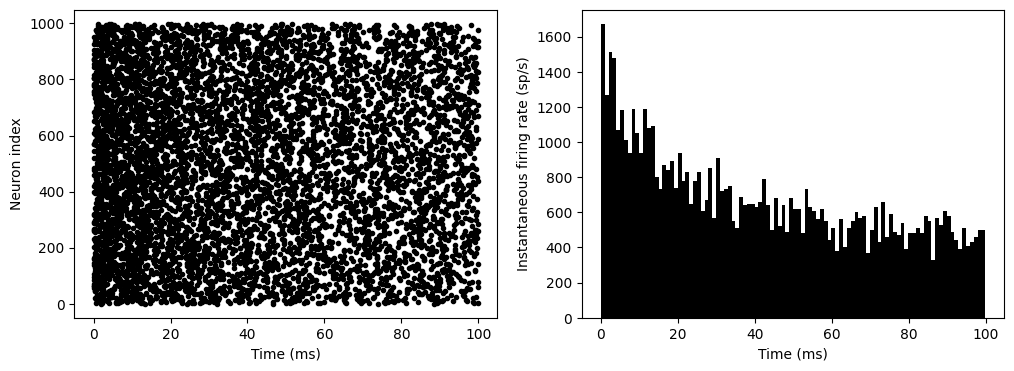

In [37]:
start_scope()

N = 1000
tau = 10*ms
vr = -70*mV
vt0 = -50*mV
delta_vt0 = 5*mV
tau_t = 100*ms
sigma = 0.5*(vt0-vr)
v_drive = 2*(vt0-vr)
duration = 100*ms

eqs = '''
dv/dt = (v_drive+vr-v)/tau + sigma*xi*tau**-0.5 : volt
dvt/dt = (vt0-vt)/tau_t : volt
'''

reset = '''
v = vr
vt += delta_vt0
'''

G = NeuronGroup(N, eqs, threshold='v>vt', reset=reset, refractory=5*ms, method='euler')
spikemon = SpikeMonitor(G)

G.v = 'rand()*(vt0-vr)+vr'
G.vt = vt0

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', weights=list(ones(len(spikemon))/(N*defaultclock.dt)))
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)')
